In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
%matplotlib widget

import nsphere as ns

from importlib import reload

In [37]:
reload(ns)

<module 'nsphere' from '/media/alessandro/OS/Users/ale57/Documents/0. Lyon/WORK/nsphere/nsphere.py'>

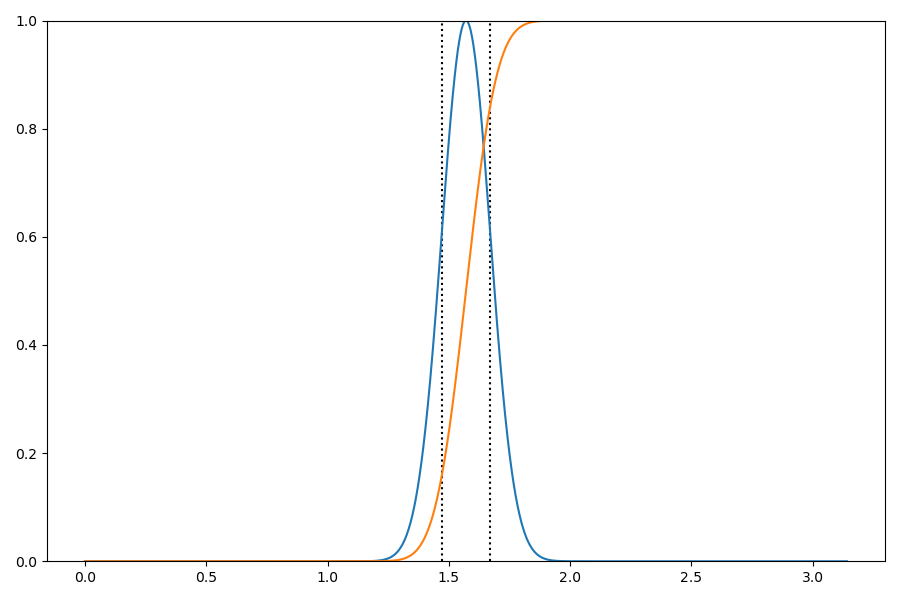

In [8]:
xs = np.arange(0, np.pi, 0.001)

d = 100
h = ns.Handler(d)
l = np.arccos(1/np.sqrt(d))

plt.close(1)
fig, ax = plt.subplots(num=1, figsize=(9,6))
ax.set_ylim(0,1)

plt.plot(xs,np.sin(xs)**d)
plt.plot(xs, h.i(xs))
plt.vlines([l, np.pi - l], *ax.get_ylim(), color='black', linestyle='dotted')

fig.tight_layout()

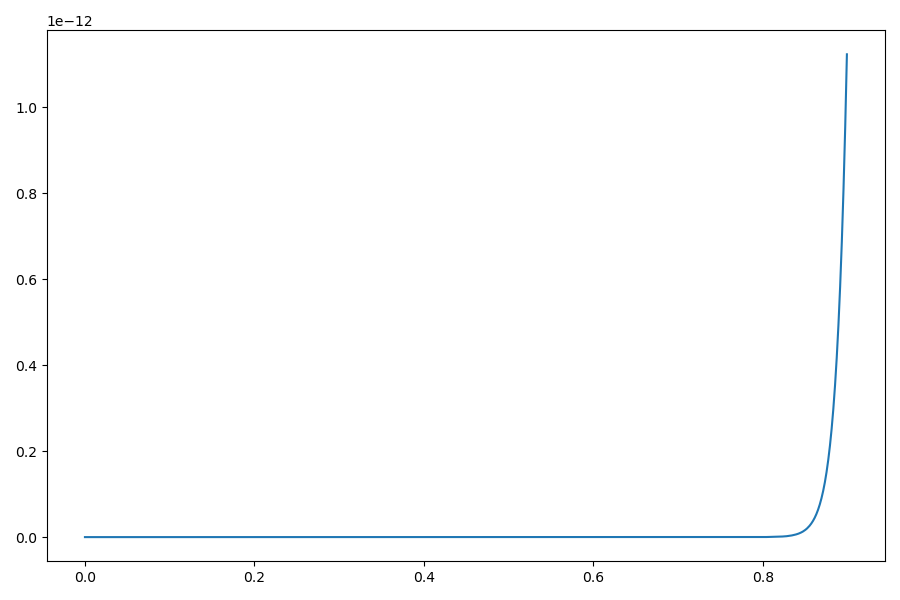

In [26]:
xs2 = np.arange(0, 0.9, 0.001)
ys2 = xs2**(d + 1)/((d + 1)*h.i_max)

plt.close(2)
fig, ax = plt.subplots(num=2, figsize=(9,6))

plt.plot(xs2, h.i(xs2))
# plt.plot(xs2, ys2)

# plt.ylim(0,1)

fig.tight_layout()

In [30]:
idv = np.vectorize(ns.i_d)

## Inverting the cumulative

In [105]:
d = 10
h = ns.Handler(d)
jac = lambda x: np.sin(x)**d/h.i_max
hess = lambda x: d*np.sin(x)**(d - 1)*np.cos(x)/h.i_max

In [106]:
r = np.random.uniform(0,0.5)

x = opt.fsolve(lambda x: h.i(x) - r, x0=r*np.pi,
)
error = h.i(x) - r
error

array([5.55111512e-17])

In [109]:
rs = []
es = []
xs = []
for i in range(1000):
    r = np.random.uniform(0,0.5)
    # diff = lambda x: np.sqrt((h.i(x) - r)**2 + 1e-7)

    # res = opt.minimize(diff,x0=r*np.pi,
    #     # jac=lambda x: (h.i(x) - r)*jac(x),
    #     jac=jac,
    #     # bounds=[(0,np.pi)],
    #     hess=None,
    #     # method='Newton-CG',
    #     tol=1e-15 
    # )
    # x = res.x
    # error = h.i(res.x) - r
    
    x = opt.fsolve(lambda x: h.i(x) - r, x0=np.pi*x, fprime=jac)
    error = h.i(x) - r
    
    rs.append(r)
    es.append(error)
    xs.append(x)

# print(f'{r = } x = {res.x}, i(x) = {h.i(res.x)}, {error = }')

/home/alessandro/anaconda3/envs/python3.9/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


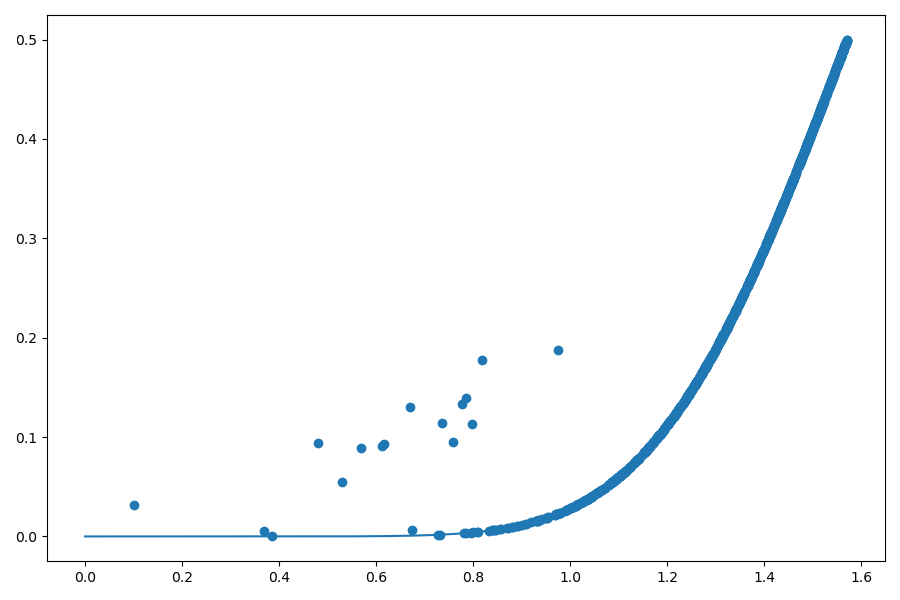

In [110]:
plt.close(4)
fig, ax = plt.subplots(num=4, figsize=(9,6))

plt.scatter(xs,rs)
_xs = np.arange(0, np.pi/2, 0.001)
plt.plot(_xs, h.i(_xs))

fig.tight_layout()

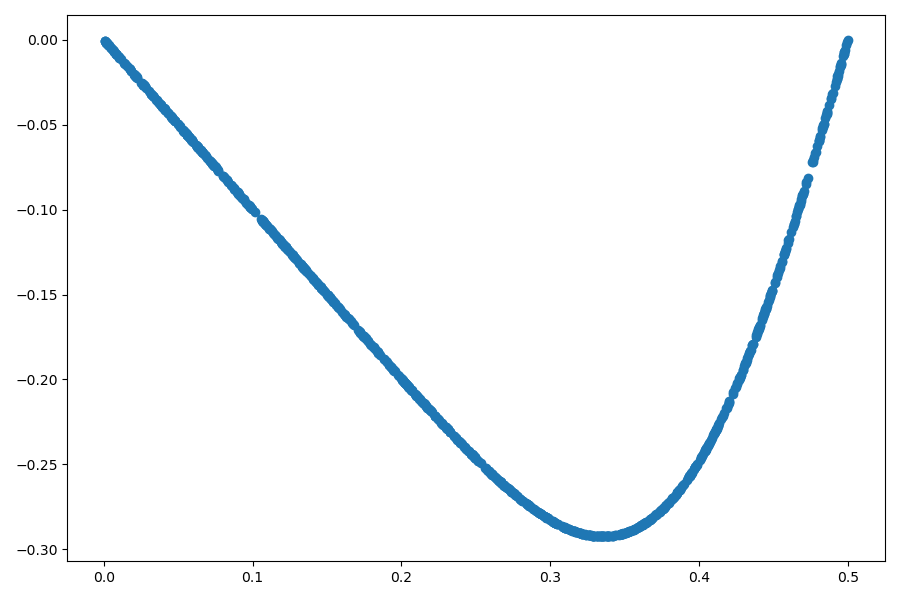

In [92]:
plt.close(3)
fig, ax = plt.subplots(num=3, figsize=(9,6))

plt.scatter(rs, es)

fig.tight_layout()

In [40]:
res

      fun: array([3.47549938e-18])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([9.81352602e-09])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 40
      nit: 3
     njev: 20
   status: 0
  success: True
        x: array([1.27179885])